# Homework 1

In [66]:
# 算法的实现均在../lib文件夹内
# opencv主要用来验证算法的正确性和图片展示

import cv2
import numpy as np
from matplotlib import pyplot as plt
import importlib
import copy
import sys 
sys.path.append("..")

# reload module in case that module changes
from lib import utils
importlib.reload(utils)
from lib import image_process
importlib.reload(image_process)

<module 'lib.image_process' from '..\\lib\\image_process.py'>

# 1. 滤波实验

### 1.1.1 2D高斯模板设计

In [25]:
# 生成不同大小、方差的2D高斯滤波核，并与标准库的结果对比
k, sigma = 1, 1
print("k=1, sigma=1")
print("my kernel:")
print(str(generate_gaussian_kernel_2d(k, sigma)))
print("cv2:")
print(cv2.getGaussianKernel(2*k+1, sigma).dot(cv2.getGaussianKernel(2*k+1, sigma).T))

k, sigma = 2, 1.5
print("k=2, sigma=1.5")
print("my kernel:")
print(str(generate_gaussian_kernel_2d(k, sigma)))
print("cv2:")
print(cv2.getGaussianKernel(2*k+1, sigma).dot(cv2.getGaussianKernel(2*k+1, sigma).T))

k=1, sigma=1
my kernel:
[[0.07511361 0.1238414  0.07511361]
 [0.1238414  0.20417996 0.1238414 ]
 [0.07511361 0.1238414  0.07511361]]
cv2:
[[0.07511361 0.1238414  0.07511361]
 [0.1238414  0.20417996 0.1238414 ]
 [0.07511361 0.1238414  0.07511361]]
k=2, sigma=1.5
my kernel:
[[0.01441882 0.02808402 0.0350727  0.02808402 0.01441882]
 [0.02808402 0.05470021 0.06831229 0.05470021 0.02808402]
 [0.0350727  0.06831229 0.08531173 0.06831229 0.0350727 ]
 [0.02808402 0.05470021 0.06831229 0.05470021 0.02808402]
 [0.01441882 0.02808402 0.0350727  0.02808402 0.01441882]]
cv2:
[[0.01441882 0.02808402 0.0350727  0.02808402 0.01441882]
 [0.02808402 0.05470021 0.06831229 0.05470021 0.02808402]
 [0.0350727  0.06831229 0.08531173 0.06831229 0.0350727 ]
 [0.02808402 0.05470021 0.06831229 0.05470021 0.02808402]
 [0.01441882 0.02808402 0.0350727  0.02808402 0.01441882]]


### 1.1.2 图像的边界处理方法

Text(0.5, 1.0, 'Reflect Across Edge')

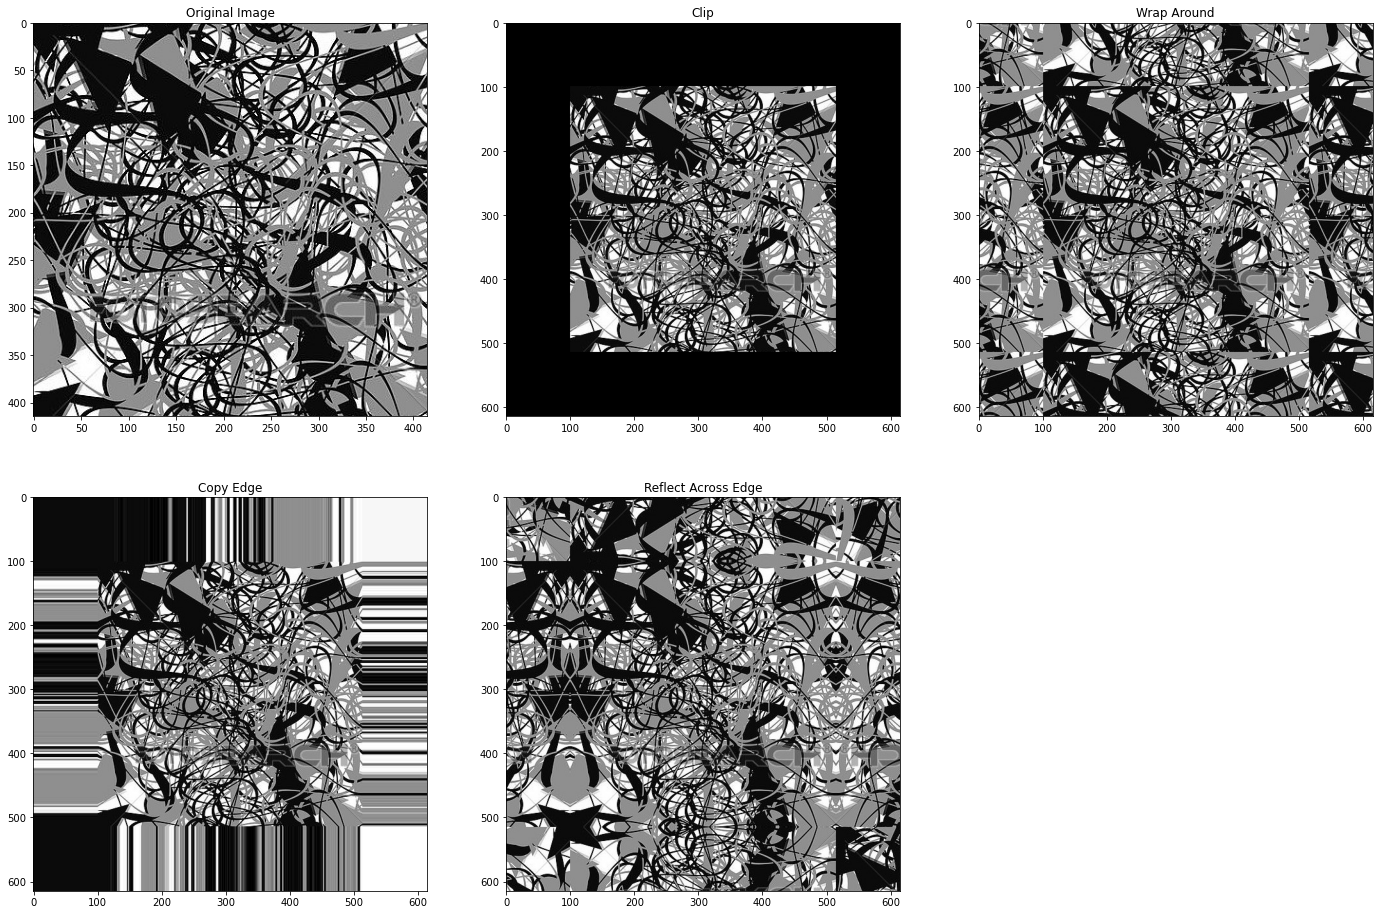

In [86]:
# 不同的边界处理方法对比。由于full convolution和same convolution类似，这里只展示full convolution的情况。
plt.figure(figsize=(24,16))

plt.subplot(231)
img = cv2.imread('img/example_01.jpg', cv2.IMREAD_GRAYSCALE)
utils.show_img(img)
plt.title("Original Image")
plt.subplot(232)
img_full_clip = image_process.boundary_process(img, 50, 'full', 'clip')
utils.show_img(img_full_clip)
plt.title("Clip")
plt.subplot(233)
img_full_wrap = image_process.boundary_process(img, 50, 'full', 'wrap')
utils.show_img(img_full_wrap)
plt.title("Wrap Around")
plt.subplot(234)
img_full_copy = image_process.boundary_process(img, 50, 'full', 'copy')
utils.show_img(img_full_copy)
plt.title("Copy Edge")
plt.subplot(235)
img_full_reflect = image_process.boundary_process(img, 50, 'full', 'reflect')
utils.show_img(img_full_reflect)
plt.title("Reflect Across Edge")